In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import LogRegAC.utilsAC as utilsAC

In [422]:
data = pd.read_csv('data.csv', header=None)
print(data.shape)
data.head()

(200, 3)


,0,1,2
0,6,32,1
1,26,39,1
2,2,38,1
3,25,39,1
4,3,35,1


In [423]:
data_x = data.iloc[:, 0:-1]
data_y = data.iloc[:, -1].replace(-1, 0)

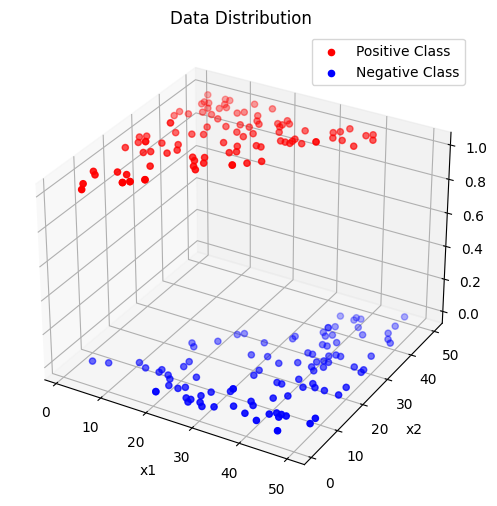

In [424]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(
    [data_x.iloc[i, 0] for i in range(len(data_x)) if data_y.iloc[i] == 1], 
    [data_x.iloc[i, 1] for i in range(len(data_x)) if data_y.iloc[i] == 1], 
    [i for i in data_y if i == 1], c='red', label='Positive Class')
ax.scatter3D(
    [data_x.iloc[i, 0] for i in range(len(data_x)) if data_y.iloc[i] != 1], 
    [data_x.iloc[i, 1] for i in range(len(data_x)) if data_y.iloc[i] != 1], 
    [i for i in data_y if i != 1], c='blue', label='Negative Class')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend()
plt.title('Data Distribution')
plt.show()

In [425]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(data_x, data_y, 0.8)
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [426]:
class LogRegAC:
    def __init__(self, lr=0.01, max_iter=1000, eps=1e-5):
        self.w = None
        self.cost_hist = []
        self.w_hist = []
        self.lr = lr
        self.max_iter = max_iter
        self.eps = eps

    def init_w_x(self, X):
        w = np.zeros((X.shape[1] + 1, 1))
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return w, X
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, X, y, w):
        z = np.dot(X, w)
        cost0 = np.dot(y.T, np.log(self.sigmoid(z)))
        cost1 = np.dot((1 - y).T, np.log(1 - self.sigmoid(z)))
        cost = -(cost0 + cost1) / len(X)
        return cost.item()
    
    def fit(self, X, y, iter_step=1):
        w, X = self.init_w_x(X)
        for i in range(self.max_iter + 1):
            w_old = w.copy()
            w = w - self.lr * np.dot(X.T, self.sigmoid(np.dot(X, w)) - np.reshape(y,(len(y),1)))
            cost = self.cost(X, y, w)
            self.cost_hist.append(cost)
            self.w_hist.append(w)
            if i % iter_step == 0:
                print(f'Iteration {i} | Cost: {cost}')
            if self.__check_convergence(w_old, w):
                print(f'Stopping criteria satisfied at iteration {i + 1}.')
                break
        self.w = w

    def predict(self, X):
        z = np.dot(self.init_w_x(X)[1], self.w)
        pred = []
        for i in self.sigmoid(z):
            if i > 0.5:
                pred.append(1)
            else:
                pred.append(0)
        return pred
    
    def __check_convergence(self, w_o, w_n):
        return np.linalg.norm(w_n - w_o) < self.eps
    
    def get_cost_hist(self):
        return self.cost_hist
    
    def get_w_hist(self):
        return self.w_hist
    
    def get_params(self):
        return self.w
    
def get_f1score(y, pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 1 and pred[i] == 1:
            tp += 1
        elif y[i] == 0 and pred[i] == 0:
            tn += 1
        elif y[i] == 0 and pred[i] == 1:
            fp += 1
        elif y[i] == 1 and pred[i] == 0:
            fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn) 
    return 2 * precision * recall / (precision + recall)

In [427]:
logReg1 = LogRegAC(lr=0.01, max_iter=1000)
logReg1.fit(train_x, train_y, iter_step=100)
pred = logReg1.predict(test_x)
print('F1 Score: ', get_f1score(test_y, pred))

Iteration 0 | Cost: 0.6655304963450566
Iteration 100 | Cost: 0.2111190473203622
Iteration 200 | Cost: 0.16227089165315745
Iteration 300 | Cost: 0.14023147298910293
Iteration 400 | Cost: 0.1268719505140154
Iteration 500 | Cost: 0.11760852088413207
Iteration 600 | Cost: 0.11066990750242559
Iteration 700 | Cost: 0.10520569106848802
Iteration 800 | Cost: 0.1007486766276815
Iteration 900 | Cost: 0.09701736696680197
Iteration 1000 | Cost: 0.09383032360427941
F1 Score:  0.9361702127659575


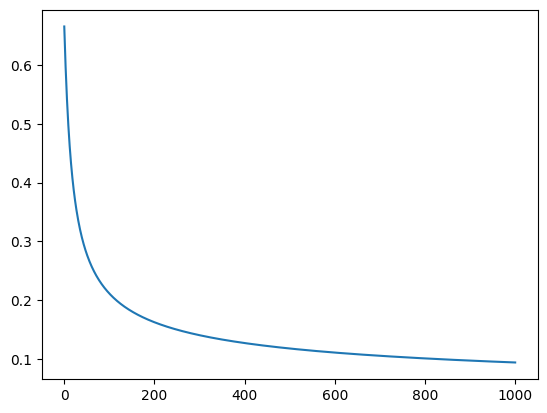

In [428]:
plt.plot(logReg1.get_cost_hist())

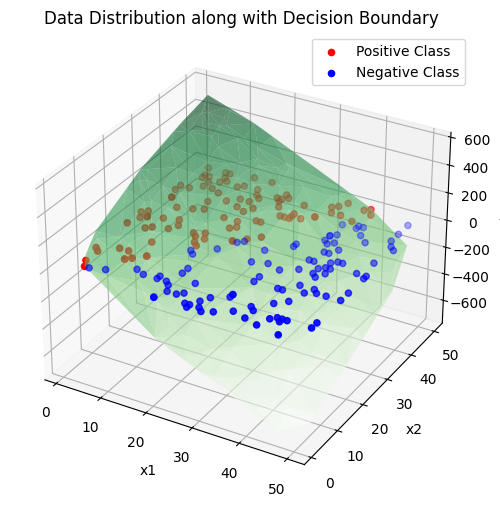

In [429]:
plt.figure(figsize=(20, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(
    [data_x.iloc[i, 0] for i in range(len(data_x)) if data_y.iloc[i] == 1], 
    [data_x.iloc[i, 1] for i in range(len(data_x)) if data_y.iloc[i] == 1], 
    [i for i in data_y if i == 1], marker='o', c='red', label='Positive Class')
ax.scatter3D(
    [data_x.iloc[i, 0] for i in range(len(data_x)) if data_y.iloc[i] != 1], 
    [data_x.iloc[i, 1] for i in range(len(data_x)) if data_y.iloc[i] != 1], 
    [i for i in data_y if i != 1], marker='o', c='blue', label='Negative Class')

plot_x = np.c_[np.ones((data_x.shape[0], 1)), data_x]
trained_weights = logReg1.get_params()
plot_pred = np.dot(plot_x, trained_weights).flatten()
ax.plot_trisurf(data_x[0], data_x[1], plot_pred,
                alpha=0.6,
                cmap='Greens')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend()
plt.title('Data Distribution along with Decision Boundary')
plt.show()